# Compare the Sizes of Data Files
Show the effect of different representations for the numbers settings on file size

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

## Load Results
Load the results from previous tests

In [2]:
results = pd.read_json('storage-results.json', lines=True)

Compute the size with reference to the smallest database (representing the base cost ofmaking the database) 

In [3]:
results['size_delta'] = results['size'] - results['size'].min()

In [4]:
results['bytes_per_row'] = results['size_delta'] / results['rows']

In [5]:
results['float_size'] = results['schema'].apply(lambda x: x['Current_A'])

In [6]:
results['test_id'] = None
for i, (_, group) in enumerate(results.groupby(['float_size'])):
    results.loc[group.index, 'test_id'] = i

In [7]:
results.head()

,rows,columns,schema,size,size_delta,bytes_per_row,float_size,test_id
0,30000,"[Current_A, Voltage_V, Cell_Temperature_C, Dat...","{'Current_A': 'REAL', 'Voltage_V': 'REAL', 'Ce...",42434296,1589248,52.974933,REAL,3
1,10000,"[Current_A, Voltage_V, Cell_Temperature_C, Dat...","{'Current_A': 'REAL', 'Voltage_V': 'REAL', 'Ce...",41385720,540672,54.067200,REAL,3
2,1,"[Current_A, Voltage_V, Cell_Temperature_C, Dat...","{'Current_A': 'REAL', 'Voltage_V': 'REAL', 'Ce...",40845048,0,0.000000,REAL,3
3,3000,"[Current_A, Voltage_V, Cell_Temperature_C, Dat...","{'Current_A': 'REAL', 'Voltage_V': 'REAL', 'Ce...",41025272,180224,60.074667,REAL,3
4,1000,"[Current_A, Voltage_V, Cell_Temperature_C, Dat...","{'Current_A': 'REAL', 'Voltage_V': 'REAL', 'Ce...",40918776,73728,73.728000,REAL,3


## Effect of Numeric Size
See how it changes as we add more data

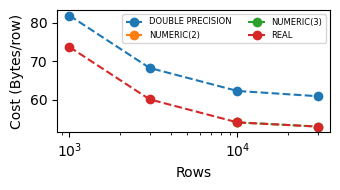

In [8]:
fig, ax = plt.subplots(figsize=(3.5, 2.), sharey=True)

for gid, group in results.query('size_delta > 0').groupby('float_size'):
    group = group.groupby('rows')['bytes_per_row'].min()
    ax.semilogx(group.index, group, '--o', label=gid)

    ax.legend(fontsize=6, ncol=2)
    ax.set_xlabel('Rows')
ax.set_ylabel('Cost (Bytes/row)')
fig.tight_layout()

fig.savefig('summary.png', dpi=320)